# Коллекции

Структура занятия:

1) переменные и типы

2) манипуляции со встроенными коллекциями

3) стандартные коллекции

4) сортировка

5) копирование

---

На что стоит обратить особое внимание:
- понятие изменяемости типа и его связь с копированием 
- на то, какие структуры данных лежат в основе коллекций


## Переменные и типы

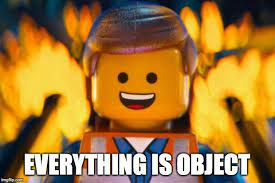

В Питоне всё является объектами!

Объекты бывают изменяемые и неизменяемые, в зависимости от типа.


Основные неизменяемые (immutable) типы:

- числовые: `int()`, `float()`, `complex()`
- последовательности и коллекции: `str()`, `tuple()`, `frozenset()`, `bytes()`

Основные изменяемые типы:

- последовательности: `list()`, `bytearray()`
- `set()`
- `dict()`
- классы и экземпляры классов
- прочие.

Под изменяемыми понимают типы, объекты которых могут быть изменены на месте

Значение неизменяемого объекта создаётся в момент его создания. 

Уничтожением объектов занимается сборщик мусора. Чтобы как-то использовать объект, его нужно запомнить. То есть нужно назвать объект.

Имена в Python не имеют типа, тип закрепляется за объектом.

Если говорить о переменных (то есть о неких ячейках, значение которых может меняться), то в Python переменных нет. Имена следует воспринимать как ссылки на объекты.

Для пояснения нам потребуется функция `id()`, которая возвращает идентификатор объекта

In [ ]:
help(id)

А также функция `type()` для получения типа

In [ ]:
var = 5  # создали новый объект типа int со значением 5 и дали ему идентификатор var
id(var), type(var)

In [ ]:
var += 5  # создали новый объект типа int со значением (var + 5) и дали ему идентификатор var
id(var), type(var)

In [ ]:
var = '1'  # создали новый объект типа str со значением '1' и дали ему идентификатор var
id(var), type(var)

In [ ]:
var = [1]  # создали новый объект типа list со значением [1] и дали ему идентификатор var
id(var), type(var)

In [ ]:
var = [2]  # создали новый объект типа list со значением [2] и дали ему идентификатор var
id(var), type(var)

In [ ]:
var.append(1)  # а вот тут мы просто обновили существующий объект с идентификатором var
# почему так? потому как list - изменяемый тип!
id(var), type(var)

Вспомним, что часть "переменных" предустановлена компилятором Python, обычно это короткие строки, малые числа

In [ ]:
a = 'a'
b = 'a'
a == b, a is b, id(a), id(b)

In [ ]:
a = 'Aaa880020006000FffffЧто-то ещё тут есть\t'
b = 'Aaa880020006000FffffЧто-то ещё тут есть\t'
a == b, a is b, id(a), id(b)

Но будьте осторожны! В Python есть построчная оптимизация!

In [ ]:
a, b = 'Aaa880020006000FffffЧто-то ещё тут есть\t', 'Aaa880020006000FffffЧто-то ещё тут есть\t'
a == b, a is b, id(a), id(b)

## Встроенные коллекции

### Двоичные и текстовые последовательности  — str, bytes, ...

*(-) Во 2 лекции*


### Последовательности — list, tuple, range

**Возможные операции над всеми последовательностями**: 
- операции сравнения
- операции проверки эквивалентности
- проверка вхождения `in` / `not in`
- объединение `s1 + s2`
- копирование самого в себя `s * n`
- взятие элемента по индексу `s[idx]`
- взятие среза `s[start_idx:stop_idx:step]`
- взятие длины `len(s)`
- взятие наименьшего `min(s)`
- взятие наибольшего `max(s)`

---

**Списки** - это изменяемые последовательности, обычно используемые для хранения однородных элементов. Задаются `[]`, `list()`

Внутри представляет из себя динамический массив. Хранит не сами объекты, а ссылки на них.

Методы:
- `.sort(*, key=None, reverse=False)` - сортировка на месте (используется тим-сорт : O(n*log(n))
- `.append(x)` - добавление элемента в конец
- `.extend(iterable)` - добавление элементов из iterable в конец
- `.insert(i, x)` - вставка элемента в позицию i
- `.reverse()` - изменение прядка на месте
- `.copy()` - создание поверхностной копии 
- `.remove(x)` - удаление первого элемента эквивалентного x
- `.count(x)` - подсчёт элементов эквивалентных x
- `.index(x)` - получение позиции первого элемента эквивалентного x
- `.pop([i])` - плучение последнего (i-го) элемента с его удалением из списка
- `.clear()` - очистка списка

In [ ]:
students = ['Masha', 'Dima']
students

In [ ]:
students = list('Masha', 'Dima')
students

In [ ]:
students = list(('Masha', 'Dima'))
students

In [ ]:
nums = list(range(10))
nums

In [ ]:
for student in students:
    print(student)

In [ ]:
'Masha' in students

In [ ]:
students[1]

In [ ]:
students[2]  # выход за границу массива

In [ ]:
students *= 3
students

In [ ]:
students[1] = 'Vlad'
students

In [ ]:
students.count('Vlad')

In [ ]:
students = [['Masha', 'Dima']]  # можно использовать 2-мерные списки
students *= 3  # покажем что * это операция копирования объекта самого в себя 
students

In [ ]:
students[0][1] = 'Vlad'
students

In [ ]:
students.count('Vlad')

In [ ]:
min(nums), max(nums)

In [ ]:
min([1, 's'])

Взятие среза, аналогично строкам

Общий синтаксис: `list_object[start:stop:step]`

In [ ]:
nums[::-1]

In [ ]:
nums[2:-2:2]

Но списки, в отличие от строк поддерживают замещение среза

In [ ]:
nums[0:2] = [99]
nums

Список может быть использован как стек

In [ ]:
stack = [3, 4, 5]
stack.append(6)
stack.append(7)
stack

In [ ]:
stack.pop()

In [ ]:
stack.pop()
stack

Не эффективен в качестве очереди (смотри сложность операции взятия 1-го элемента)! Пример ниже лучше не использовать на практике, для реализации очереди в модуле `collections` есть специальная структура данных `deque` 

In [ ]:
queue = [3, 4, 5]
queue.insert(0, 1)
queue

In [ ]:
queue.pop(0)

In [ ]:
queue

Генератор списка (List Comprehensions)

Общий синтаксис: `[modify(x) for x in iterable if condition(x)]`

In [ ]:
[x**2 for x in [2, 4]]

In [ ]:
# в генераторах можно запутаться, не следует использовать цепочки генераторов
[x**2 for x in [2, 4] for x in [44, 135]  for x in [1, 11]]  # осторожно с этим!

In [ ]:
students = [['Masha', 'Dima']]
students = [x for x in range(3) for x in students]  # это тоже копирование
students[0][1] = 'Vlad'
students

Списки это нехешируемый тип

In [ ]:
hash([])

Сложность операций

Операция | В среднем | В худшем
---|---|---
`.copy()`|O(n)|O(n) 
`.append(x)`|O(1) |O(n) 
`lst[i]`|O(1)|O(1)
`x in lst`|O(n)|O(n)
`del lst[i]`|O(n)|O(n)
`.sort()`|O(n log n)|O(n log n)

---
**Кортежи** - это неизменяемые индексируемые последовательности, обычно используемые для хранения разнородных данных. Задаются `()`, `tuple`, `(a, )`, `a,`

Методы отсутствуют, но есть возможность распаковки и запаковки:

```python
t = 1, 2, 3
x, y, z = t
```

Вообще говоря кортежи служат единственной цели - быть переданными в функцию

Кортеж является хешируемым типом, но объект кортежа хешируем только в том случае если хешируемы все его элементы 

In [ ]:
(1, ), type((1, ))  # так можно задать кортеж из 1 элемента

In [ ]:
(1), type((1))  # а это уже не кортеж!

In [ ]:
s = 1,  # так тоже можно задать кортеж из 1 элемента, по лучше всё-таки использовать скобки
s, type(s)

In [ ]:
hash((1, ))

In [ ]:
(1, [])

In [ ]:
hash((1, []))

In [ ]:
k = (1, 2, 3)
min(k)

In [ ]:
k = (1, 2, [])
min(k)

In [ ]:
k = (1, [])

In [ ]:
k[0]

In [ ]:
k[0] = []

<span style="color:red">Далее не генератор кортежа!</span> Это так называемое выражение-генератор. О генераторах речь пойдёт много дальше

In [ ]:
gen = (i for i in (1, 2))
gen

---

**Диапазон** - представляет неизменяемую последовательность чисел и обычно используется для выполнения определенного количества раз цикла `for`. Задаются `range(stop)`, `range(start, stop[, step])`

Методы отсутствуют

In [ ]:
range(5)

In [ ]:
list(range(5))

In [ ]:
for i in range(5, 10, 2):
    print(i)

### Наборы — set, frozenset

`set` - множество

`frozenset` - статическое множество (его невозможно модифицировать, зато оно хешируемо)

Неупорядоченные коллекции элементов. Каждый элемент представлен в единственном экземпляре. Все элементы должны быть хешируемыми.

Внутри - хеш-таблица.

Задаются:

In [ ]:
set([1, 2, 1])

In [ ]:
inner_set = {1, 2}
{1, 2, 'some', inner_set}

In [ ]:
inner_set.add(3)
inner_set

In [ ]:
inner_set = frozenset({1, 2, 1})
{1, 2, 'some', inner_set}

In [ ]:
inner_set.add(3)

**Операции и методы:**
- операции сравнения `==`. При этом set и frozenset сравнимы
- проверка вхождения `.issubset(other)` / `.issuperset(other)` / `>=` / `<=` / `>` / `<`
- объединение `.union(*others)` / `s1 | s2 | ...`
- пересечение `.intersection(*others)` / `s1 & s2 & ...`
- разность `.difference(*others)` / `s1 - s2 - ...`
- симметрическая разность `.symmetric_difference(*others)` / `s1 ^ s2 ^ ...`
- копирование (неглубокое) `.copy()`

Дополнительно для set:
- добавление всех  элементов `.update(*others)` / `s1 |= s2 | ...`
- сохранение только всех повторяющихся элементов `.intersection_update(*others)` / `s1 &= s2 & ...`
- сохранение только уникальных элементов из 1-го set `.difference_update(*others)` / `s1 -= s2 - ...`
- сохранение только всех уникальных элементов `.symmetric_difference_update(*others)` / `s1 ^= s2 ^ ...`
- добавление `.add(x)`
- удаление `.remove(x)`
- удаление с проверкой наличия (не возвращает исключения в случае отсутствия элемента) `.discard(x)`
- получение случайного элемента с его удалением `.pop()`
- очистка `.clear()`

In [ ]:
{1, 2} + {1, 2}

![image](img.png)

In [ ]:
s1 = {1, 2, 3, 4}
s2 = {3, 4, 5, 6}
s1 & s2

In [ ]:
s1 - s2

In [ ]:
s1 ^ s2

In [ ]:
s1 | s2

Генератор (пример)

Общий синтаксис: `{modify(x) for x in iterable if condition(x)}`

In [ ]:
{x%3 for x in (1, 2, 3, 4, 5, 6, 7, 8, 9)}

Сложность операций

Операция | В среднем | В худшем
---|---|---
`.add(x)`|O(1) |O(n) 
`x in lst`|O(1)|O(n)
`del s[i]`|O(1)|O(n)
`.copy()`|O(n)|O(n)

### Сопоставления (словари, мапы) — dict

Изменяемый объект, содержит пары вида ключ-значение, ключи словаря должны быть хешируемыми уникальными объектами, значения могут быть любыми

Вообще говоря, неупорядоченная коллекция данных, но с версии питона 3.6, сохраняется (не говорю что гарантируется) порядок вставки элементов

Внутри хеш-таблица со всеми вытекающими от сюда ограничениями

Задаются:

In [ ]:
{1: 'Maksim', 2: 'Masha'}  # ключи - любые хешируемые объекты - этот способ предпочтителен

In [ ]:
dict(Maksim=1, Masha=2) # ключи - только строки

In [ ]:
dict(Maksim=1, Masha=2, 3='Dima')

**Операции и методы:**
- `list(d)` - получить все ключи
- `len(d)` - получение числа элементов (пар ключ-значение)
- `d[key]` - получение значения по ключу
- `d[key] = value` - присвоение значения по ключу
- `del d[key]` - удаление элемента
- `key in d` / `key not in d` - проверка ключа
- `.clear()` - очистка
- `.copy()` - создание неглубокой копии
- `.get(key[, default=None])` - получение значения по ключу, или default если ключ отсутствует
- `.items()` - получение отображения пар типа ключ-значения
- `.keys()` - получение отображения ключей
- `.values()` - получение отображения значений
- `.pop(key[, default])` - получение и удаление пары ключ-значения по ключу, или default если ключ отсутствует
- `.popitem()` - получение и удаление пары ключ-значения в порядке LIFO
- `.update([other])` - обновление словаря элементами другого словаря
- итерация

In [ ]:
for i in {1:1, 2:2}:  # итерация выведет только ключи
    print(i)

In [ ]:
for i in {1:1, 2:2}.items():  # итерация по отображению items будет выводить пары
    print(i)

In [ ]:
d = {'Maksim': 5, 'Misha': 4, 'Anton': 3, 'Dima': 4, 'Oleg': 2, 'Katya': 4, 'Ira': 5}

In [ ]:
d['Dima']

In [ ]:
del d['Maksim']

In [ ]:
d['Oleg'] = 3

In [ ]:
d.pop('Anton')

In [ ]:
d.popitem()

In [ ]:
d

In [ ]:
len(d)

Генератор (пример)

Общий синтаксис: `{modify_key(k): modify_value(v) for k, v in iterable if condition(k, v)}`

In [ ]:
{k: v for k, v in [(1, 3), (2, 3), (1, 4)]}

items

Сложность операций

Операция | В среднем | В худшем
---|---|---
`.add(x)`|O(1) |O(n) 
`x in lst`|O(1)|O(n)
`del s[i]`|O(1)|O(n)
`.copy()`|O(n)|O(n)

## Стандартные коллекции

### collections.deque

Подходит для создания очереди

`deque([iterable[, maxlen]])`

Если указан параметр `maxlen`, после заполнения при добавлении новых элементов, дек начинает отбрасывать значения с противоположного конца

In [ ]:
from collections import deque
queue = deque(["Eric", "John", "Michael"])
queue.append("Terry")
queue.append("Graham")
queue.popleft() 

In [ ]:
queue

In [ ]:
d = deque([0, 1, 2, 3], 4)
d

In [ ]:
d.append(4)
d

In [ ]:
d.appendleft(-1)
d

In [ ]:
d.insert(2, 9)
d

Сложность операций

Операция | В среднем | В худшем
---|---|---
`.copy()`|O(n)|O(n) 
`.append(x)`|O(1) |O(n) 
`.appendleft(x)`|O(1) |O(n) 
`.pop()`|O(1)|O(1)
`.popleft()`|O(1)|O(1)
`.remove(v)`|O(n)|O(n)
`.rotate(k=1)`|O(k)|O(k)
`.insert(i, x)`|O(n)|O(n)

### collections.Counter

In [ ]:
from collections import Counter

c = Counter('abracadabra')
c

In [ ]:
c = Counter({'a': 2, 'b': 3})
c

In [ ]:
c = Counter([1, 2, 3, 1])
c

In [ ]:
c[4]

In [ ]:
c.most_common(1)

### collections.defaultdict

In [ ]:
from collections import defaultdict

dd = defaultdict(int)
for i in 'abracadabra':
    dd[i] += 1
dd

In [ ]:
dd = defaultdict(list)
for i in 'abracadabra':
    dd[i].append(1)
dd

### array.array

Модуль array предоставляет эффективные массивы числовых значений. Используется, как правило, в низкоуровневом программировании

Последовательноось типа `array` очень похожа по функционалу на `list`. По сути, единственное отличие - заранее заданный тип элементов

Задаётся:
`array.array(typecode[, initializer])`

In [ ]:
from array import array
help(array)

In [ ]:
arr = array('l', [1, 2, 3, 4, 5])

In [ ]:
arr = array('l', [1, 2, 3, 4, 0.2])

## Сортировка

В Python представлена 1 функцией `sorted(iterable, /, *, key=None, reverse=False)` и методами коллекций `.sort(*args, **kwargs)`

Стандартная сортировка в Python осуществляется по алгоритму [Тимсорт](https://ru.wikipedia.org/wiki/Timsort)

### sorted

Функция, которая 
1. не меняет исходную коллекцию
2. всегда возвращает список из элементов исходной коллекции
3. может быть применена к неизменяемым коллекциям (так как на выходе всё-равно список)
4. выполняет устойчивую сортировку - т.е. элементы с равными ключами не будут между собой меняться местами
5. элементы коллекции должны быть сравнимы

In [ ]:
my_list = [9, 1, 2, 8]
sorted(my_list)

In [ ]:
my_list

In [ ]:
my_set = {9, 1, 2, 8}
sorted(my_set)

In [ ]:
my_str = 'abracadabra'
sorted(my_str)  # вернёт всё-равно список

In [ ]:
my_dict = {'ИУ-10': 10, 'ИУ-8': 8, 'И-10': 10}
sorted(my_dict)  # сортировка строк происходит в лексикографическом формате

In [ ]:
sorted(my_dict.items())  # по умолчанию в качестве ключа будет взят 1-й элемент из кортежа

In [ ]:
sorted(my_dict.values())

In [ ]:
sorted(my_list, reverse=True)

In [ ]:
sorted(my_dict.items(), key=lambda x: x[1])

Выше использована анонимная функция, которая возвращает 2-й элемент некоторого итерируемого объекта, В нашем случае из пары клю-значение будет возращаться значение.

Обратите внимание на то что ('ИУ-10', 10) и ('И-10', 10) не поменялись местами. Так происходит потому-что их ключи сортировки равны (значения пар равны, иными словами равны 2-е элементы) и сортировка устойчивая!

### sort

Метод изменяемых упорядоченных коллекций, который
1. меняет исходную коллекцию
2. возращает коллекцию исходного типа
3. выполняет устойчивую сортировку
4. элементы должны быть сравнимы

In [ ]:
s = [1, 2, 5, 3]
s.sort()
s

In [ ]:
s = {1, 2, 5, 3}
s.sort()
s

In [ ]:
class Point:  # создаём тип Point
    def __init__(self, x, y):  # определяем конструктор в магическом методе __init__
        self.x = x  # присваиваем атрибутам данных некоторые значения из аргументов конструктора
        self.y = y
    
s = [Point(2, 2), Point(2, '1')]
s.sort()

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __lt__(self, other):  # этот магический метод определяет то как мы будем сравнивать между собой экземпляры класса Point
        return self.x < other.x 
    
s = [Point(2, 2), Point(1, '1')]
s

In [ ]:
s.sort()
s

## Копирование

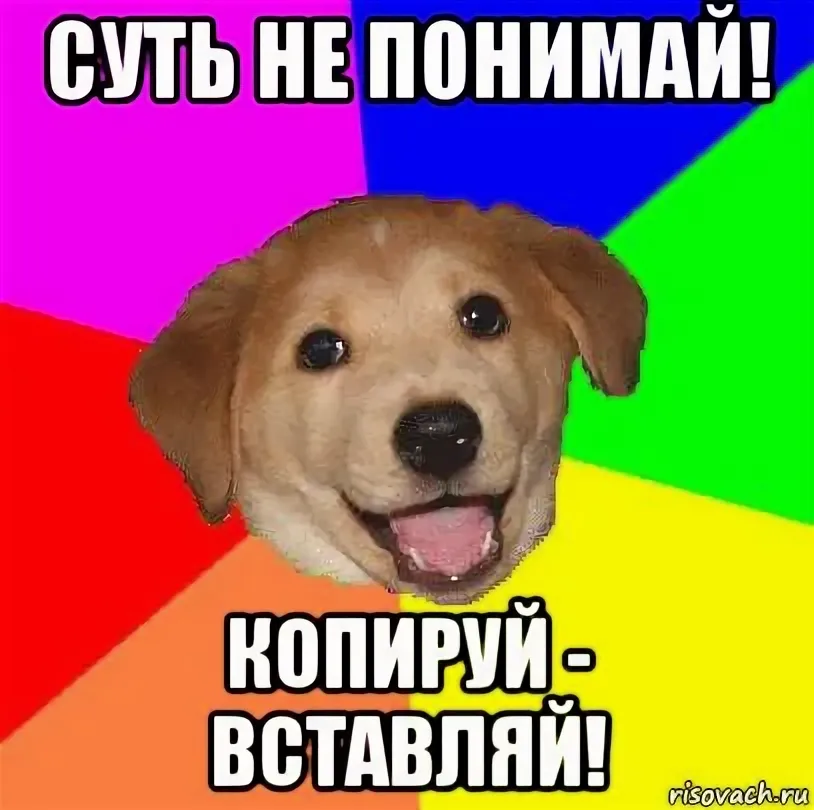

Существует 2 типа копирования
1. Поверхностное - при копировании создаётся новый составной объект, в который далее вставляются ссылки из изначального (копируемого) объекта
2. Глубокое - создаётся новый составной объект, затем рекурсивно копируется содержимое изначального объекта

Имеет смысл создавать копии только изменяемых объектов. Неизменяемым можно просто присвоить новое имя

Для начала уясним что простое присваивание через "=" не является копированием:

In [ ]:
s = [1,2,3]
d = s
# это не копирование, мы просто назначаем списку (list - изменяемый тип) 2-й идентификатор, 
# который будет ссылаться на тот же объект
d[0] = 99  # это приведёт к тому что изменится и s
s, d

In [ ]:
id(s), id(d)

In [ ]:
s1 = 'Это строка и она неизменяема'
s2 = s1
# и это не копирование, но так как значения неизменяемого типа str равны, они будут иметь один идентификатор 
id(s1), id(s2)

In [ ]:
s2 = s2.replace('Это ', '')
# помним, что строки неизменяемы! Мы просто создали новый объект типа str со значением s2.replace('Это ', '')
# и присвоили этому объекту имя s2
id(s1), id(s2)

In [ ]:
s1, s2

Для копирования используется модуль `copy`

In [ ]:
import copy

s = [1,2,3]
d = copy.copy(s)
# создаём поверхностную копию, но так как у нас нет вложенных изменяемых объектов, эта копия является настоящей
d[0] = 99  # это приведёт к тому что изменится только d так как в s у нас копия
s, d

Со вложенными изменяемыми структурами сложннее, рассмотрим на примере списка списков

In [ ]:
s1 = [[1, 13, 12], [8, 12, 9], [12, 89, 7]]
s2 = copy.copy(s1)  # создание поверхностной копии
s2[0][0] = 2  # изменим 1-й элемент 1-го вложенного списка
s2

In [ ]:
s1  # увидим что s2 тоже поменялась!
# почему так?!
# хотя s2 и является копией s1, в s2 хранятся ссылки на объекты из s1: [1, 13, 12], [8, 12, 9], [12, 89, 7]
# потому как эти объекты изменяемого типа (имеют тип list)

In [ ]:
s3 = copy.deepcopy(s1)  # создание глубокой копии
s3[0][0] = -1  # изменим 1-й элемент 1-го вложенного списка
s3  # увидим что s1 не поменялась!
# почему так?!
# deepcopy создаёт полноценную копию рекурсивно! deepcopy вообще не оставляет ссылок на исходные объекты

In [ ]:
s1

Поверхностные копии можно создавать проще, многие коллекции поддерживают метод `.copy()`, а для списка можно воспользоваться полным срезом `[:]`

In [ ]:
s4 = s3[:]
s4[0][0] = -9
s4

In [ ]:
s3

In [ ]:
s5 = s3.copy()
s5[0][0] = -16
s5

In [ ]:
s3

Глубокое копирование имеет ограничение! Копируемый элемент должен быть сериализуем

In [ ]:
from requests import Session
from multiprocessing import Pool
sess = Session()
p = Pool()

In [ ]:
p_copy = copy.deepcopy(p)

In [ ]:
sess_copy = copy.deepcopy(sess)